In [49]:
# Problem 3: set-up
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn import svm
import math
mnist = fetch_mldata('MNIST original')

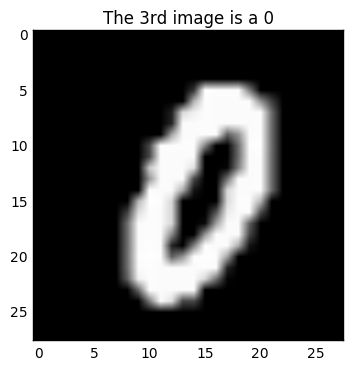

X is 70000 x 784 and Y is 70000 x 1


In [50]:
# Problem 3: put data into more convenient form and plot test image
X = mnist.data
y = mnist.target
import matplotlib.pyplot as plt
plt.title('The 3rd image is a {label}'.format(label=int(y[2])))
plt.imshow(X[2].reshape((28,28)),cmap='gray')
plt.show()
print("X is %d x %d and Y is %d x %x" % (len(X),len(X[0]),len(y),1))

In [51]:
# Problem 3: build training & testing sets to classify between the images of the digits 4 & 9
# Separate training set into fit & holdout sets to choose best SVM parameter C
import numpy as np
import random
X4 = X[y==4,:]
y4 = y[y==4]
X9 = X[y==9,:]
y9 = y[y==9]
Xfit = np.concatenate((X4[0:2000],X9[0:2000]),axis=0)
yfit = np.concatenate((y4[0:2000],y9[0:2000]),axis=0)
Xholdout = np.concatenate((X4[2000:4000],X9[2000:4000]),axis=0)
yholdout = np.concatenate((y4[2000:4000],y9[2000:4000]),axis=0)
Xtest = np.concatenate((X4[4000:],X9[4000:]),axis=0)
ytest = np.concatenate((y4[4000:],y9[4000:]),axis=0)

In [52]:
# Problem 3a: Use built in solver to find best C parameter for poly 1st degree SVM on training dataset
# First choose range of C's to test, train each C on Xfit/yfit
X = np.linspace(-5,5,11)
C = 10**X
Pe = np.zeros(len(C))
for i in range(0,len(C)):
    clf = svm.SVC(C[i],kernel='poly',degree=1)
    clf.fit(Xfit,yfit)
    Pe[i]=1-clf.score(Xholdout,yholdout)
    print("C = %.6f and Pe = %.6f" % (C[i],Pe[i]))

C = 0.000010 and Pe = 0.055000
C = 0.000100 and Pe = 0.039250
C = 0.001000 and Pe = 0.033000
C = 0.010000 and Pe = 0.036250
C = 0.100000 and Pe = 0.047750
C = 1.000000 and Pe = 0.047750
C = 10.000000 and Pe = 0.047750
C = 100.000000 and Pe = 0.047750
C = 1000.000000 and Pe = 0.047750
C = 10000.000000 and Pe = 0.047750
C = 100000.000000 and Pe = 0.047750


In [55]:
# Problem 3a: Train an SVM using inhomogeneous linear and quadratic kernel. Report best C value, test error & # of support vectors
Cmin = C[np.argmin(Pe)]
R_Cmin = math.log(Cmin,10)
X1 = np.linspace(R_Cmin-1,R_Cmin+1,11)
C1 = 10**X1
Pe1 = np.zeros(len(C1))
for i in range(0,len(C1)):
    clf = svm.SVC(C1[i],kernel='poly',degree=1)
    clf.fit(Xfit,yfit)
    Pe1[i]=1-clf.score(Xholdout,yholdout)
    print("C = %.6f and Pe = %.6f" % (C1[i],Pe1[i]))

C = 0.000100 and Pe = 0.039250
C = 0.000158 and Pe = 0.037750
C = 0.000251 and Pe = 0.036250
C = 0.000398 and Pe = 0.034500
C = 0.000631 and Pe = 0.033500
C = 0.001000 and Pe = 0.033000
C = 0.001585 and Pe = 0.033750
C = 0.002512 and Pe = 0.034500
C = 0.003981 and Pe = 0.033500
C = 0.006310 and Pe = 0.033250
C = 0.010000 and Pe = 0.036250


In [57]:
C1min = C1[np.argmin(Pe1)]
R_C1min = math.log(C1min,10)
X2 = np.linspace(R_C1min-.1,R_C1min+.1,11)
C2 = 10**X2
Pe2 = np.zeros(len(C2))
for i in range(len(C2)):
    clf = svm.SVC(C2[i],kernel='poly',degree=1)
    clf.fit(Xfit,yfit)
    Pe2[i]=1-clf.score(Xholdout,yholdout)
    print("C = %.6f and Pe = %.6f" % (C2[i],Pe2[i]))

C = 0.000794 and Pe = 0.033750
C = 0.000832 and Pe = 0.033500
C = 0.000871 and Pe = 0.033500
C = 0.000912 and Pe = 0.033500
C = 0.000955 and Pe = 0.032750
C = 0.001000 and Pe = 0.033000
C = 0.001047 and Pe = 0.032250
C = 0.001096 and Pe = 0.032500
C = 0.001148 and Pe = 0.032500
C = 0.001202 and Pe = 0.033250
C = 0.001259 and Pe = 0.033500


In [65]:
C2min = C2[np.argmin(Pe1)]
clf = svm.SVC(C2min,kernel='poly',degree=1)
clf.fit(Xfit,yfit)
Pe_fin = 1-clf.score(Xholdout,yholdout)
print("Best C = %.4f, where test error = %.4f and support vectors = %s" % (C2min, Pe_fin, clf.support_vectors_.shape))

Best C = 0.0010, where test error = 0.0330 and support vectors = (457, 784)


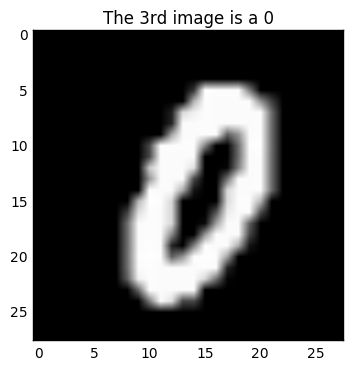

X is 70000 x 784 and Y is 70000 x 1
Deg = 1, Spread = 10.0, C = 0.000010, Pe = 0.055000
Deg = 1, Spread = 10.0, C = 0.000100, Pe = 0.039250
Deg = 1, Spread = 10.0, C = 0.001000, Pe = 0.033000
Deg = 1, Spread = 10.0, C = 0.010000, Pe = 0.036250
Deg = 1, Spread = 10.0, C = 0.100000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 1.000000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 10.000000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 100.000000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 1000.000000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 10000.000000, Pe = 0.047750
Deg = 1, Spread = 10.0, C = 100000.000000, Pe = 0.047750
Round finished, Pe_min = 0.033000, Cmin = 0.0010 & log(Cmin) = -3.0000
Deg = 1, Spread = 2.0, C = 0.000100, Pe = 0.039250
Deg = 1, Spread = 2.0, C = 0.000158, Pe = 0.037750
Deg = 1, Spread = 2.0, C = 0.000251, Pe = 0.036250
Deg = 1, Spread = 2.0, C = 0.000398, Pe = 0.034500
Deg = 1, Spread = 2.0, C = 0.000631, Pe = 0.033500
Deg = 1, Spread = 2.0, C = 0.001000, Pe = 0.033000


In [81]:
%run HW03_3a.py

In [68]:
print(np.amin(Pe))

0.03225


In [88]:
# Problem 3b: switch to rbf kernel and determine best gamma
Xc = np.linspace(0,10,5)
C = 10**Xc
Xg = np.linspace(-10,0,5)
gamma = 10**Xg
Pe = np.zeros((len(C),len(C)))
for i in range(0,len(C)):
    for j in range(0,len(gamma)):
        clf = svm.SVC(C[i],kernel='rbf',gamma=gamma[j])
        clf.fit(Xfit,yfit)
        Pe[i][j]=1-clf.score(Xholdout,yholdout)
        print("C = %.1f and gamma = %.8f give Pe = %.4f" % (C[i],gamma[j],Pe[i][j]))

C = 1.000000 and gamma = 0.000000 give Pe = 0.176000
C = 1.000000 and gamma = 0.000000 give Pe = 0.037000
C = 1.000000 and gamma = 0.000010 give Pe = 0.405250
C = 1.000000 and gamma = 0.003162 give Pe = 0.500000
C = 1.000000 and gamma = 1.000000 give Pe = 0.500000
C = 316.227766 and gamma = 0.000000 give Pe = 0.042500
C = 316.227766 and gamma = 0.000000 give Pe = 0.020500
C = 316.227766 and gamma = 0.000010 give Pe = 0.389250
C = 316.227766 and gamma = 0.003162 give Pe = 0.500000
C = 316.227766 and gamma = 1.000000 give Pe = 0.500000
C = 100000.000000 and gamma = 0.000000 give Pe = 0.036500
C = 100000.000000 and gamma = 0.000000 give Pe = 0.020500
C = 100000.000000 and gamma = 0.000010 give Pe = 0.389250
C = 100000.000000 and gamma = 0.003162 give Pe = 0.500000
C = 100000.000000 and gamma = 1.000000 give Pe = 0.500000
C = 31622776.601684 and gamma = 0.000000 give Pe = 0.047250
C = 31622776.601684 and gamma = 0.000000 give Pe = 0.020500
C = 31622776.601684 and gamma = 0.000010 give Pe =

In [92]:
print(Pe)

[[ 0.176    0.037    0.40525  0.5      0.5    ]
 [ 0.0425   0.0205   0.38925  0.5      0.5    ]
 [ 0.0365   0.0205   0.38925  0.5      0.5    ]
 [ 0.04725  0.0205   0.38925  0.5      0.5    ]
 [ 0.04725  0.0205   0.38925  0.5      0.5    ]]


In [97]:
minval = np.amin(Pe)
argmin = np.argmin(Pe)
print("Min val = %.4f and min arg = %d" % (minval,argmin))

Min val = 0.0205 and min arg = 6


In [100]:
Cc = argmin%5
gc = argmin-Cc*5
print("C center = row #%d, g center = column #%d" % (Cc,gc))
print("C center val = %.6f, g center val = %.8f" % (C[Cc],gamma[gc]))

C center = row #1, g center = column #1
C center val = 316.227766, g center val = 0.00000003


In [103]:
R_Cc = math.log(C[Cc],10)
R_gc = math.log(gamma[gc],10)
Xc1 = np.linspace(R_Cc-1.25,R_Cc+1.25,5)
C1 = 10**Xc1
Xg1 = np.linspace(R_gc-1.25,R_gc+1.25,5)
gamma1 = 10**Xg1
Pe1 = np.zeros((len(C1),len(C1)))
for i in range(0,len(C1)):
    for j in range(0,len(gamma1)):
        clf = svm.SVC(C1[i],kernel='rbf',gamma=gamma1[j])
        clf.fit(Xfit,yfit)
        Pe1[i][j]=1-clf.score(Xholdout,yholdout)
        print("C1 = %.6f and gamma1 = %.6f give Pe1 = %.6f" % (C1[i],gamma1[j],Pe1[i][j]))

C1 = 17.782794 and gamma1 = 0.000000 give Pe1 = 0.042250
C1 = 17.782794 and gamma1 = 0.000000 give Pe1 = 0.033750
C1 = 17.782794 and gamma1 = 0.000000 give Pe1 = 0.024000
C1 = 17.782794 and gamma1 = 0.000000 give Pe1 = 0.015500
C1 = 17.782794 and gamma1 = 0.000001 give Pe1 = 0.012250
C1 = 74.989421 and gamma1 = 0.000000 give Pe1 = 0.036000
C1 = 74.989421 and gamma1 = 0.000000 give Pe1 = 0.029500
C1 = 74.989421 and gamma1 = 0.000000 give Pe1 = 0.020750
C1 = 74.989421 and gamma1 = 0.000000 give Pe1 = 0.016250
C1 = 74.989421 and gamma1 = 0.000001 give Pe1 = 0.012250
C1 = 316.227766 and gamma1 = 0.000000 give Pe1 = 0.032750
C1 = 316.227766 and gamma1 = 0.000000 give Pe1 = 0.027500
C1 = 316.227766 and gamma1 = 0.000000 give Pe1 = 0.020500
C1 = 316.227766 and gamma1 = 0.000000 give Pe1 = 0.016250
C1 = 316.227766 and gamma1 = 0.000001 give Pe1 = 0.012250
C1 = 1333.521432 and gamma1 = 0.000000 give Pe1 = 0.031250
C1 = 1333.521432 and gamma1 = 0.000000 give Pe1 = 0.024500
C1 = 1333.521432 and g

In [107]:
print(Pe1)
minval1 = np.amin(Pe1)
argmin1 = np.argmin(Pe1)
print("Min val = %.4f and min arg = %d" % (minval1,argmin1))
if(argmin1<5): Cc1 = 0
else: Cc1 = argmin1%5
gc1 = argmin1-Cc1*5
print("C center = row #%d, g center = column #%d" % (Cc1,gc1))
print("C center val = %.6f, g center val = %.8f" % (C1[Cc1],gamma1[gc1]))

[[ 0.04225  0.03375  0.024    0.0155   0.01225]
 [ 0.036    0.0295   0.02075  0.01625  0.01225]
 [ 0.03275  0.0275   0.0205   0.01625  0.01225]
 [ 0.03125  0.0245   0.0205   0.01625  0.01225]
 [ 0.03     0.0245   0.0205   0.01625  0.01225]]
Min val = 0.0122 and min arg = 4
C center = row #0, g center = column #4
C center val = 17.782794, g center val = 0.00000056


In [108]:
R_Cc1 = math.log(C1[Cc1],10)
R_gc1 = math.log(gamma1[gc1],10)
Xc2 = np.linspace(R_Cc1-5/16,R_Cc1+5/16,5)
C2 = 10**Xc2
Xg2 = np.linspace(R_gc1-5/16,R_gc1+5/16,5)
gamma2 = 10**Xg2
Pe2 = np.zeros((len(C2),len(C2)))
for i in range(0,len(C2)):
    for j in range(0,len(gamma2)):
        clf = svm.SVC(C2[i],kernel='rbf',gamma=gamma2[j])
        clf.fit(Xfit,yfit)
        Pe2[i][j]=1-clf.score(Xholdout,yholdout)
        print("C2 = %.6f and gamma2 = %.6f give Pe2 = %.6f" % (C2[i],gamma2[j],Pe2[i][j]))
print(Pe2)
minval2 = np.amin(Pe2)
argmin2 = np.argmin(Pe2)
print("Min val = %.4f and min arg = %d" % (minval2,argmin2))
if(argmin2<5): Cc2 = 0
else: Cc2 = argmin2%5
gc2 = argmin2-Cc2*5
print("C center = row #%d, g center = column #%d" % (Cc2,gc2))
print("C center val = %.6f, g center val = %.8f" % (C2[Cc2],gamma2[gc2]))

C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.000001 give Pe2 = 0.012250
C2 = 17.782794 and gamma2 = 0.0

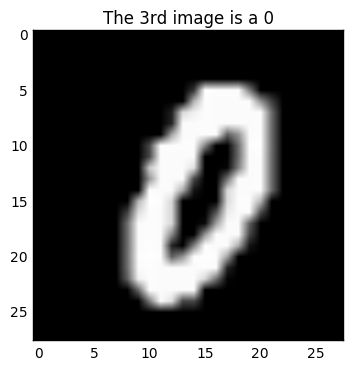

X is 70000 x 784 and Y is 70000 x 1
C=1.00 and gamma = 0.00000000 give Pe = 0.1760
C=1.00 and gamma = 0.00000003 give Pe = 0.0370
C=1.00 and gamma = 0.00001000 give Pe = 0.4052
C=1.00 and gamma = 0.00316228 give Pe = 0.5000
C=1.00 and gamma = 1.00000000 give Pe = 0.5000
C=316.23 and gamma = 0.00000000 give Pe = 0.0425
C=316.23 and gamma = 0.00000003 give Pe = 0.0205
C=316.23 and gamma = 0.00001000 give Pe = 0.3892
C=316.23 and gamma = 0.00316228 give Pe = 0.5000
C=316.23 and gamma = 1.00000000 give Pe = 0.5000
C=100000.00 and gamma = 0.00000000 give Pe = 0.0365
C=100000.00 and gamma = 0.00000003 give Pe = 0.0205
C=100000.00 and gamma = 0.00001000 give Pe = 0.3892
C=100000.00 and gamma = 0.00316228 give Pe = 0.5000
C=100000.00 and gamma = 1.00000000 give Pe = 0.5000
C=31622776.60 and gamma = 0.00000000 give Pe = 0.0473
C=31622776.60 and gamma = 0.00000003 give Pe = 0.0205
C=31622776.60 and gamma = 0.00001000 give Pe = 0.3892
C=31622776.60 and gamma = 0.00316228 give Pe = 0.5000
C=316227

In [135]:
%run HW03_3a.py

In [138]:
Cc = 316.22776
gamma = 0.000000001
clf = svm.SVC(Cc, kernel = 'rbf', gamma=gamma)
clf.fit(Xtrain,ytrain)
Pe_fin = 1-clf.score(Xtest,ytest)
print("Best (C,gamma) = (%.6f,%.8f) where probability of error = %.4f and support vectors = %s" % (Cc, gc, Pe_fin, clf.support_vectors_.shape))


Best (C,gamma) = (316.227760,0.00000000) where probability of error = 0.0299 and support vectors = (934, 784)


In [143]:
for i in range(0,len(clf.support_vectors_)):
    print(clf.support_vectors_[i])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.   83.  149.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  104.  245.
    9.    0.    0.    0.    0.    0.    0.    0.   

In [180]:
ys_sv = np.sign(clf.dual_coef_)
print(ys_sv.shape)
ypos_sv = clf.support_vectors_[np.where(ys_sv==1)[1]]
print(ypos_sv.shape)
yneg_sv = clf.support_vectors_[np.where(ys_sv==-1)[1]]
print(yneg_sv.shape)
df = clf.decision_function(Xholdout)
print(df.shape)

(1, 934)
(466, 784)
(468, 784)
(4000,)
